# Zadanie 1
Pobieraj dane z pliku https://github.com/przem85/statistics/blob/master/D8/ANOVA4.txt
Zawiera on dane z eksperymentu na roślinach, które były hodowane w trzech  różnych warunki wzrostu. 

- Wykonaj ANOVA
- Czy trzy grupy są różne?
- Wykonaj analizę post hoc, który z par jest inny? 
- Czy porównanie nieparametryczne (Kruskal-Wallis test) prowadzi do innego wyniku? 

In [19]:
import numpy as np
import scipy.stats as stats
import pandas as pd

In [20]:
df = pd.read_csv('ANOVA4.txt',sep=" ",header=None, names=['group','weight'])
df.head()

,group,weight
0,Control,4.17
1,Control,5.58
2,Control,5.18
3,Control,6.11
4,Control,4.50


In [9]:
df.group.value_counts()

Control       10
TreatmentA    10
TreatmentB    10
Name: group, dtype: int64

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)
from statsmodels.stats.libqsturng import psturng
from scipy.stats.mstats import kruskalwallis
from statsmodels.stats import multicomp

## Wykonujemy ANOVE jednoczynnikową

In [12]:
f, p = stats.f_oneway(df[df['group'] == 'Control'].weight,
                      df[df['group'] == 'TreatmentA'].weight,
                      df[df['group'] == 'TreatmentB'].weight)
 
print ('One-way ANOVA')
print ('=============')
 
print ('F value:', f)
print ('P value:', p, '\n')

if p < 0.05:
    print('One of the groups is significantly different.')

# hipoteza H0 mówi o równości
# wg anova - leczenia są różne, ale statystycznie nieistotne, jedno pogarsza, drugie poprawia

One-way ANOVA
F value: 6.005680376516912
P value: 0.00695554199802733 

One of the groups is significantly different.


## Sprawdzamy założenie o równości wariancji

In [22]:
d1 = df[df['group'] == 'Control'].weight
d2 = df[df['group'] == 'TreatmentA'].weight
d3 = df[df['group'] == 'TreatmentB'].weight

# test Levene
(W,p) = stats.levene(d1, d2, d3)
if p<0.05:
    print('Warning: p-value of test Levene is < 0,05, pvalue =',p)
else:
    print('wg testu Levene test przeszedł, pvalue =',p)

wg testu Levene test przeszedł, pvalue = 0.32927821561008164


In [23]:
# analiza post-hoc
multiComp = MultiComparison(df['group'], df['weight'])

In [15]:
type(df.weight.iloc[3])

numpy.float64

In [24]:
multiComp.tukeyhsd().summary() - # nie działa, błąd jakichś typów

SyntaxError: invalid syntax (<ipython-input-24-e69a30ea7c10>, line 1)

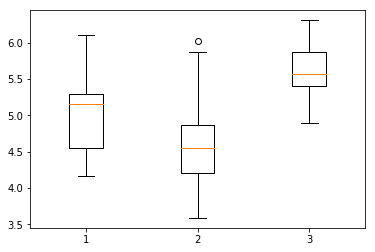

In [17]:
plt.boxplot((d1, d2, d3))
plt.show()

In [26]:
# test Kruskala - Wallisa
h, p = kruskalwallis(d1, d2, d3)

# Print the results
if p<0.05:
    print('There is a significant difference between the cities.')
else:
    print('No significant difference between the cities.')


TypeError: float() argument must be a string or a number, not 'SingleBlockManager'